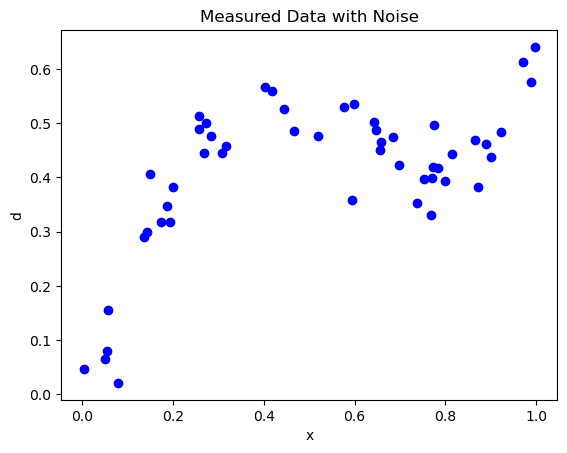

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1024)  # ensure same noise for each run

# number of training points
n = 50

# sample n random points between 0 and 1
x = np.random.rand(n,1)

# set d = x^2 + .4 sin(1.5 pi x) + noise
d = x*x + 0.4*np.sin(1.5*np.pi*x) +0.04*np.random.randn(n,1)

# plot result
plt.plot(x,d,'bo')
plt.xlabel('x')
plt.ylabel('d')
plt.title('Measured Data with Noise')
plt.show()

Sigma =  0.04


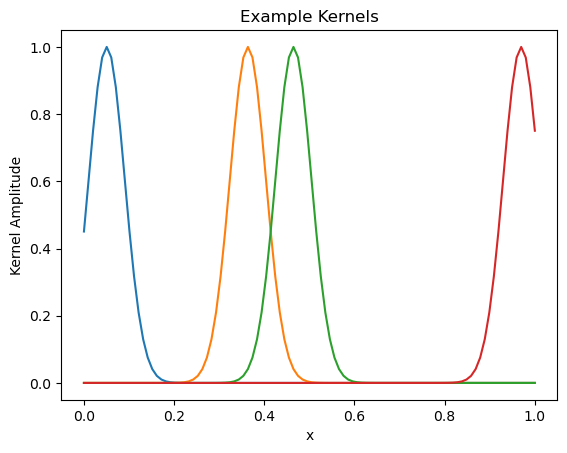

Sigma =  0.2


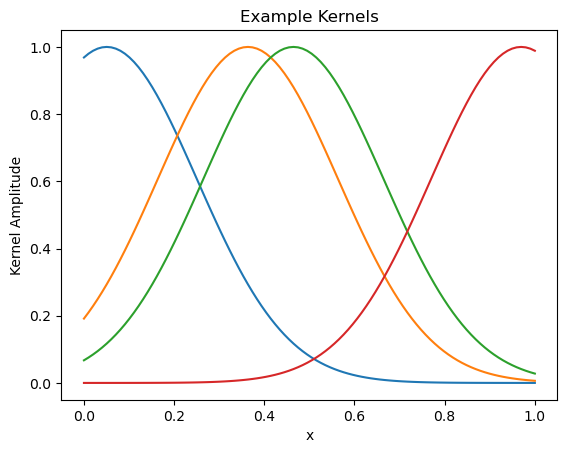

Sigma =  1


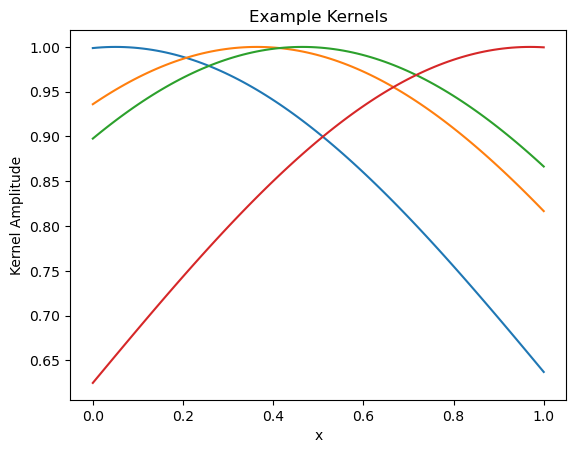

Sigma =  0.04


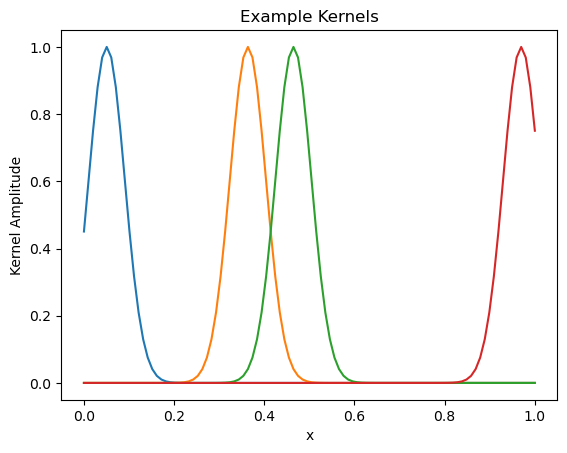

Sigma =  0.2


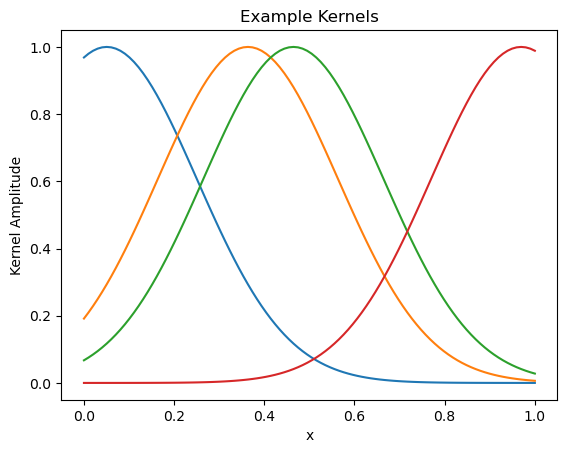

In [15]:
# sigma = 0.04 #defines Gaussian kernel width
sigma = [0.04, 0.2, 1, 0.04, 0.2]
p = 100 #number of points on x-axis

# Display examples of the kernels
x_test = np.linspace(0,1.00,p)  # uniformly sample interval [0,1]
j_list = [5, 36, 46, 96]  #list of indices for example kernels 

Kdisplay = np.zeros((p,len(j_list)),dtype=float)

def display_kernels(sigma, p, x_test, j_list, Kdisplay):
    for v in sigma:
        for i in range(p):
            for j in range(len(j_list)):
                Kdisplay[i,j]= np.exp(-(x_test[i]-x_test[j_list[j]])**2/(2*v**2))
    
        print('Sigma = ',v)
        plt.plot(x_test, Kdisplay)
        plt.title('Example Kernels')
        plt.xlabel('x')
        plt.ylabel('Kernel Amplitude')
        plt.show()

    return Kdisplay

Kdisplay = display_kernels(sigma, p, x_test, j_list, Kdisplay)

#### 1a) Run the regression script with σ = 0.04 and λ = 0.01. Figure 1 displays several of the kernels K(x, xi). What is the value xi associated with the kernel having the third peak from the left? What property of the kernel is determined by xi? What property is determined by σ?

xi decides the kernel position (the center of the curve), while sigma decide the width of the curve.

In [16]:
# Kernel fitting to data

# lam = 0.01 #ridge regression parameter
lam = [0.01, 0.01, 0.01, 1, 1]
distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        distsq[i,j]=(x[i]-x[j])**2

K = [0, 0, 0, 0, 0]
for i, v in enumerate(sigma):
    K[i] = np.exp(-distsq/(2*v**2))

alpha = [0, 0, 0, 0, 0]
for i, v in enumerate(lam):
    alpha[i] = np.linalg.inv(K[i]+v*np.identity(n))@d

C:\Users\ftstc\AppData\Local\Temp\ipykernel_11404\2047022157.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distsq[i,j]=(x[i]-x[j])**2


Sigma =  0.04
Lambda =  0.01


C:\Users\ftstc\AppData\Local\Temp\ipykernel_11404\1025918452.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distsq_xtest[i,j] = (x_test[i]-x[j])**2


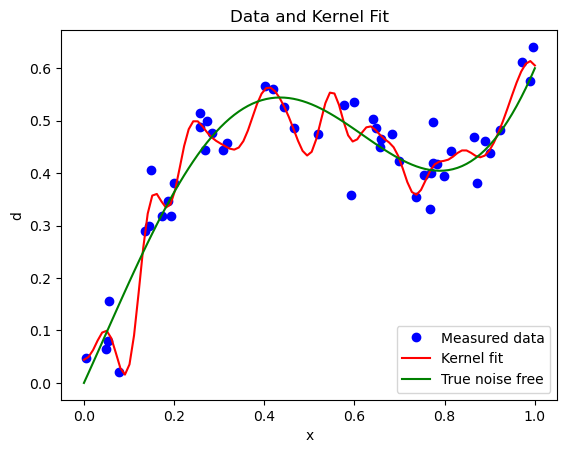

Sigma =  0.2
Lambda =  0.01


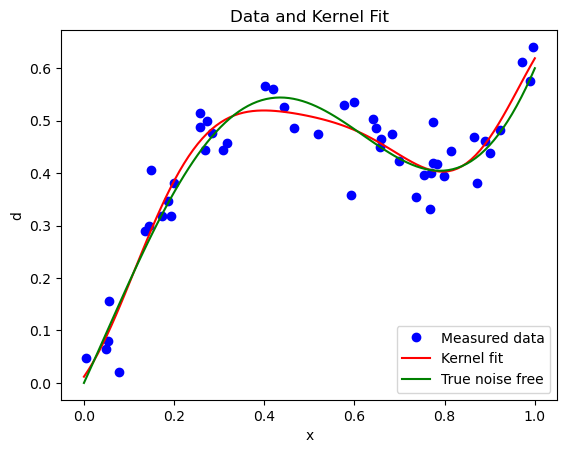

Sigma =  1
Lambda =  0.01


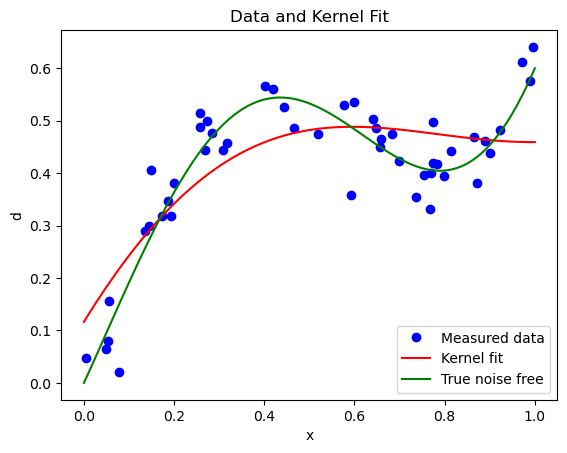

Sigma =  0.04
Lambda =  1


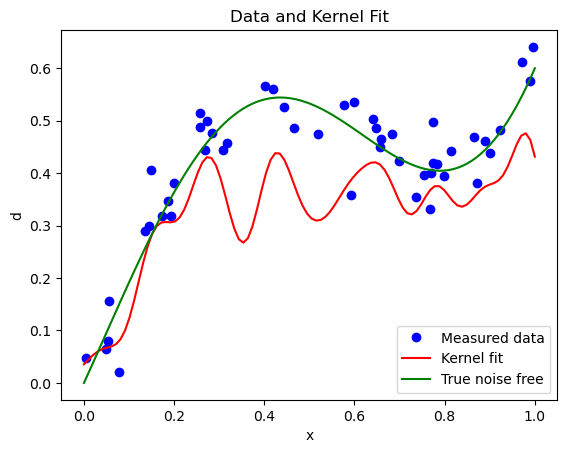

Sigma =  0.2
Lambda =  1


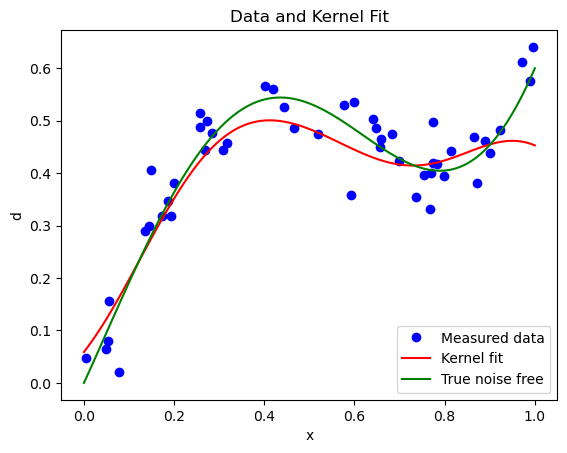

In [17]:
# Generate smooth curve corresponding to data fit

distsq_xtest = np.zeros((p,n),dtype=float)
for i in range(0,p):
    for j in range(0,n):
        distsq_xtest[i,j] = (x_test[i]-x[j])**2

dtest = [0, 0, 0, 0, 0]
for i, v in enumerate(sigma):
    dtest[i] = np.exp(-distsq_xtest/(2*v**2))@alpha[i]

    dtrue = x_test*x_test + 0.4*np.sin(1.5*np.pi*x_test)  # noise free data for comparison
    
    print('Sigma = ',sigma[i])
    print('Lambda = ',lam[i])
    plt.plot(x,d,'bo',label='Measured data')
    plt.plot(x_test,dtest[i],'r',label='Kernel fit')
    plt.plot(x_test,dtrue,'g',label='True noise free')
    plt.title('Data and Kernel Fit')
    plt.legend(loc='lower right')
    plt.xlabel('x')
    plt.ylabel('d')
    plt.show()

#### 1b) Discuss how λ and σ aﬀect the characteristics of the kernel regression to the measured data, and support your conclusions with rationale and plots.
When lambda turns bigger, the kernel fit line are pulled down, showing d declines. When sigma turns bigger, the kernel fit line become smoother.

#### 1c) What principle could you apply to select appropriate values for λ and σ?
Use the combination of lambda and sigma, utilize cross validation, and then calculate the sqaured error.